In [2]:
import sys
sys.path.append('..')
from utils.rootLoad import rootLoad
rootLoad()

Shared objects loaded.
Now you can use ROOT in this notebook.


In [3]:
import polars as pl
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
applicationSet = pl.read_parquet('../data/saved/application.parquet')
applicationSet = applicationSet.filter((pl.col('p') < 1.5) &
                                       (np.abs(pl.col('deltaP')) < 5))
applicationSet.describe()

describe,sign,p,pt,pTPC,pITS,eta,phi,tgL,chi2ITS,chi2TPC,chi2ITSTPC,dEdx,nClusTPC,nSigmaDeu,nSigmaP,nSigmaK,nSigmaPi,nSigmaE,clSizeL0,clSizeL1,clSizeL2,clSizeL3,clSizeL4,clSizeL5,clSizeL6,cosL,meanClSize,clSizeCosL,nSigmaAbsDeu,nSigmaAbsP,nSigmaAbsK,nSigmaAbsPi,nSigmaAbsE,deltaP,partID,mass,beta,betaML,deltaBeta
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",2.461504e6,2.461504e6,2.461504e6,2.461504e6,2.461504e6,2.461504e6,2.461504e6,2.461504e6,2.461504e6,2.461504e6,2.461504e6,2.461504e6,2.461504e6,2.461504e6,2.461504e6,2.461504e6,2.461504e6,2.461504e6,2.461504e6,2.461504e6,2.461504e6,2.461504e6,2.461504e6,2.461504e6,2.461504e6,2.461504e6,2.461504e6,2.461504e6,2.461504e6,2.461504e6,2.461504e6,2.461504e6,2.461504e6,2.461504e6,2.461504e6,2.461504e6,2.461504e6,2.461504e6,2.461504e6
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",-0.015464,0.605659,0.491695,0.591399,0.604257,0.012511,3.127052,0.013379,7.625518,49.846966,2.61781,58.567802,130.700174,-12.460356,-9.254205,-4.833837,1.300906,-4.060034,NaN,NaN,NaN,2.984693,NaN,NaN,NaN,0.703669,2.654872,1.790025,12.460608,9.312688,6.003238,1.957584,4.947476,-0.030471,NaN,NaN,NaN,0.909777,NaN
"""std""",0.999881,0.333411,0.274302,0.333087,0.336692,0.677128,1.829652,0.778188,7.61052,18.118731,1.506586,43.18848,20.007168,1.917289,4.065556,5.596254,9.106769,7.823006,NaN,NaN,NaN,1.74608,NaN,NaN,NaN,0.218227,1.073614,0.79875,1.915645,3.929745,4.318005,8.988518,7.294229,0.08044,NaN,NaN,NaN,0.076939,NaN
"""min""",-1.0,0.123756,0.112919,0.093757,0.080396,-1.390306,0.000005,-1.88354,0.000054,3.809927,0.00049,-38.188869,81.0,-999.0,-999.0,-999.0,-999.0,-999.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.21989,0.142857,0.039018,0.000231,8.5729e-7,0.000002,0.0,0.0,-4.993957,211.0,0.13957,0.172309,0.294962,-0.500199
"""25%""",-1.0,0.334553,0.274732,0.321274,0.332376,-0.570519,1.527627,-0.601977,3.070775,38.084076,1.380936,50.639027,121.0,-13.836675,-12.61008,-9.301402,-0.481717,-5.483422,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.515253,2.0,1.239804,11.631399,6.663091,2.123591,0.400179,4.168957,-0.070849,211.0,0.13957,0.9447,0.884611,0.000643
"""50%""",-1.0,0.523192,0.420968,0.509485,0.520678,0.058284,3.090385,0.058317,5.60996,47.676029,2.403096,54.01125,139.0,-13.197421,-10.535488,-5.436093,0.328435,-4.896193,3.0,3.0,3.0,3.0,3.0,3.0,3.0,0.726115,2.714286,1.741589,13.197442,10.536919,5.871677,0.860274,4.932332,-0.025955,NaN,NaN,NaN,0.934639,NaN
"""75%""",1.0,0.815153,0.647752,0.799434,0.811831,0.590914,4.759535,0.625908,9.520645,58.952457,3.724619,58.491489,145.0,-11.631357,-6.659935,-0.996482,1.23984,-4.090299,5.0,4.0,4.0,4.0,4.0,4.0,4.0,0.909296,3.285714,2.278152,13.836678,12.610812,9.520542,1.538465,5.519041,0.015703,NaN,NaN,NaN,0.961794,NaN
"""max""",1.0,1.499999,1.49966,9.770453,7.529098,1.354083,6.283182,1.807511,179.432999,1289.384521,5.999986,8290.326172,209.0,20.155722,96.448067,328.181122,1813.039062,1474.858154,96.0,271.0,472.0,61.0,72.0,60.0,47.0,1.0,69.428571,29.685505,999.0,999.0,999.0,1813.039062,1474.858154,0.912428,1.0000e9,1.875613,0.995687,1.00774,1.532756


# Analysis of the mid $\pi$-K
Here is presented a study of some variables for particles whose reconstructed betas (betaML) lie between the values of the theoretical beta curves for $\pi$ and K, but their species was not identified with TPC selections.

In [5]:
from utils.particles import particleMasses

In [6]:

midPiK = applicationSet.filter( (pl.col('betaML') <  (pl.col('p') / np.sqrt(pl.col('p')**2 + particleMasses['Pi']**2))) & 
                                (pl.col('betaML') >  (pl.col('p') / np.sqrt(pl.col('p')**2 + particleMasses['K']**2))) &
                                (pl.col('p') < 0.8) &
                                (pl.col('partID') == np.nan))

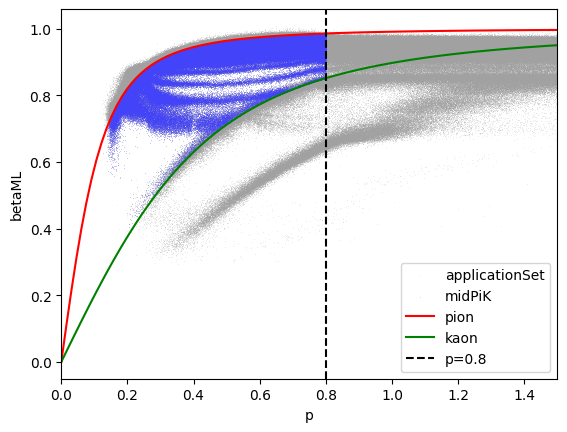

In [7]:
sns.scatterplot(data=applicationSet, x='p', y='betaML', color='gray', label='applicationSet', s=0.1)
sns.scatterplot(data=midPiK, x='p', y='betaML', color='blue', label='midPiK', s=0.1)

plt.xlim(0, 1.5)

# draw the pion and kaon beta lines
x = np.linspace(0, 1.5, 100)
y = np.linspace(0, 1, 100)
yPi = x / np.sqrt(x**2 + particleMasses['Pi']**2)
yK = x / np.sqrt(x**2 + particleMasses['K']**2)
plt.plot(x, yPi, color='red', label='pion')
plt.plot(x, yK, color='green', label='kaon')
plt.axvline(x=0.8, color='black', linestyle='--', label='p=0.8')

plt.legend()
plt.show()


## ($p_{TPC}$ - $p_{ITS}$) / $p_{TPC}$ vs $p_{TPC}$

Text(0, 0.5, '($p_{TPC}$ - $p_{ITS}$)/$p_{TPC}$')

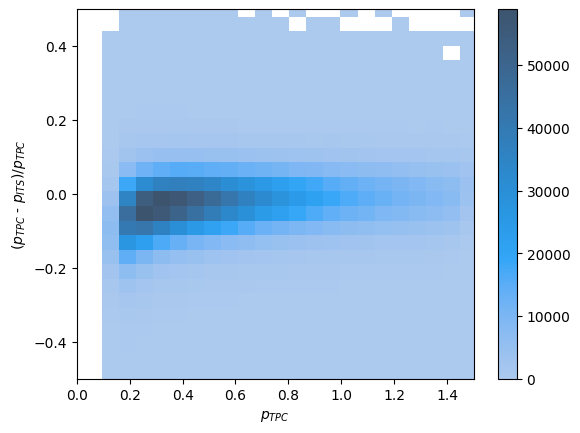

In [8]:
sns.histplot(data=applicationSet, x='pTPC', y='deltaP', bins=150, cbar=True)
plt.xlim(0, 1.5)
plt.ylim(-0.5, 0.5)
plt.xlabel('$p_{TPC}$')
plt.ylabel('($p_{TPC}$ - $p_{ITS}$)/$p_{TPC}$')

Text(0, 0.5, '($p_{TPC}$ - $p_{ITS}$)/$p_{TPC}$')

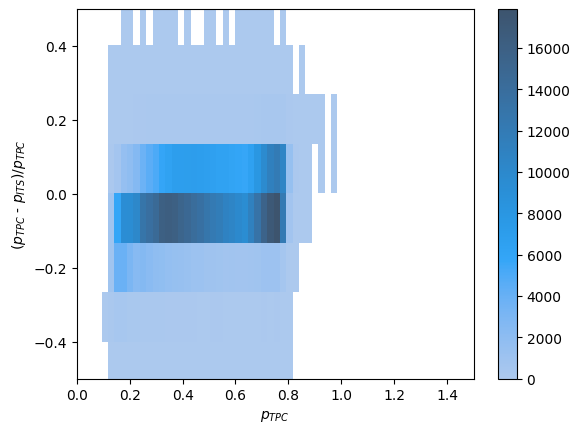

In [12]:
sns.histplot(data=midPiK, x='pTPC', y='deltaP', bins=80, cbar=True)
plt.xlim(0, 1.5)
plt.ylim(-0.5, 0.5)
plt.xlabel('$p_{TPC}$')
plt.ylabel('($p_{TPC}$ - $p_{ITS}$)/$p_{TPC}$')

## $\frac{dE}{dx}$ vs $p_{TPC}$ 

Text(0, 0.5, 'dE/dx')

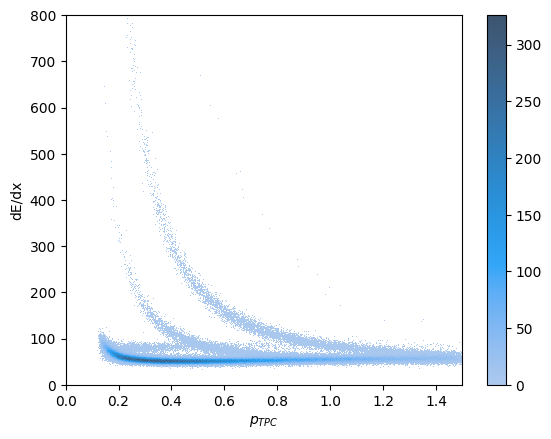

In [10]:
sns.histplot(data=applicationSet, x='pTPC', y='dEdx', bins=10000, cbar=True)
plt.xlim(0, 1.5)
plt.ylim(0, 800)
plt.xlabel('$p_{TPC}$')
plt.ylabel('dE/dx')

Text(0, 0.5, 'dE/dx')

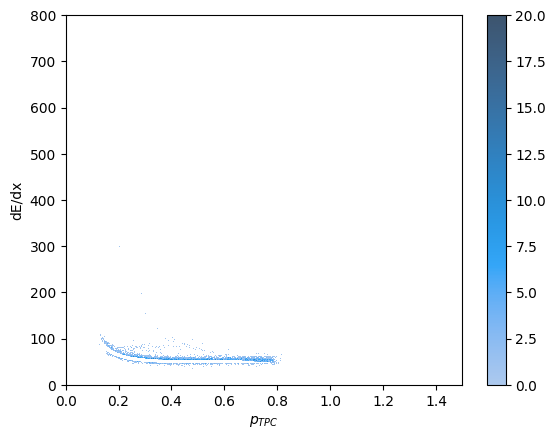

In [11]:
sns.histplot(data=midPiK, x='pTPC', y='dEdx', bins=10000, cbar=True)
plt.xlim(0, 1.5)
plt.ylim(0, 800)
plt.xlabel('$p_{TPC}$')
plt.ylabel('dE/dx')

nSigmaPi vs $p_{TPC}$

In [ ]:
sns.histplot(data=midPiK, x='pTPC', y='nSigmaPi', bins=10000, cbar=True)
plt.xlim(0, 1.5)
plt.ylim(-10, 10)
plt.xlabel('$p_{TPC}$')
plt.ylabel('nSigmaPi')